In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("/workspaces/Projects/Regression/data.csv")

In [3]:
print(data.shape)
print(data.columns)
print(data.tail())
print(data.isnull().any())
print(data.describe())
print(data.info())

(1460, 81)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

In [4]:
data_type = pd.DataFrame(data.dtypes).T.rename({0: 'Column Data Type'})
null_value = pd.DataFrame(data.isnull().sum()).T.rename({0: 'Null Values'})
data_info = pd.concat([data_type, null_value], axis=0)
print(data_info)

                     Id MSSubClass MSZoning LotFrontage LotArea  Street  \
Column Data Type  int64      int64   object     float64   int64  object   
Null Values           0          0        0         259       0       0   

                   Alley LotShape LandContour Utilities  ... PoolArea  PoolQC  \
Column Data Type  object   object      object    object  ...    int64  object   
Null Values         1369        0           0         0  ...        0    1453   

                   Fence MiscFeature MiscVal MoSold YrSold SaleType  \
Column Data Type  object      object   int64  int64  int64   object   
Null Values         1179        1406       0      0      0        0   

                 SaleCondition SalePrice  
Column Data Type        object     int64  
Null Values                  0         0  

[2 rows x 81 columns]


In [5]:
print(data.nunique())
print(data.head())

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN 

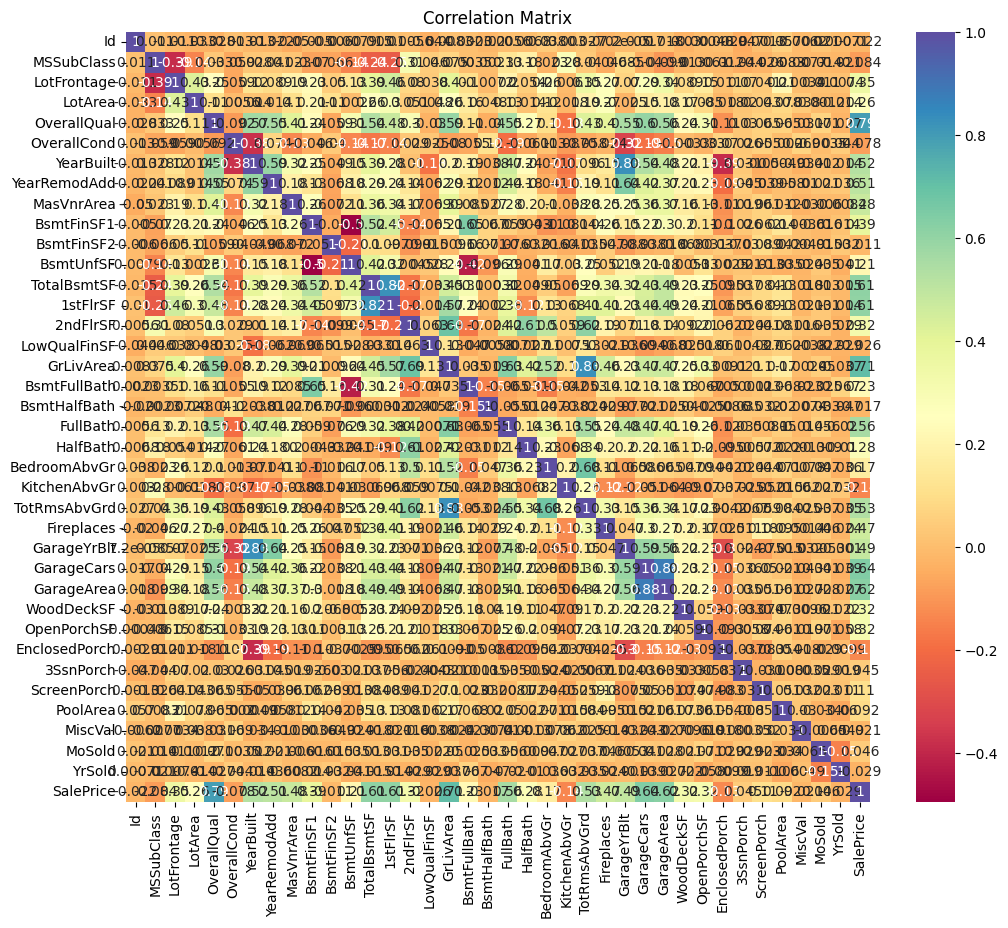

In [6]:
corr = data.select_dtypes(include=[np.number]).corr()  # Only numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(data=corr, annot=True, cmap='Spectral').set(title="Correlation Matrix")
plt.show()

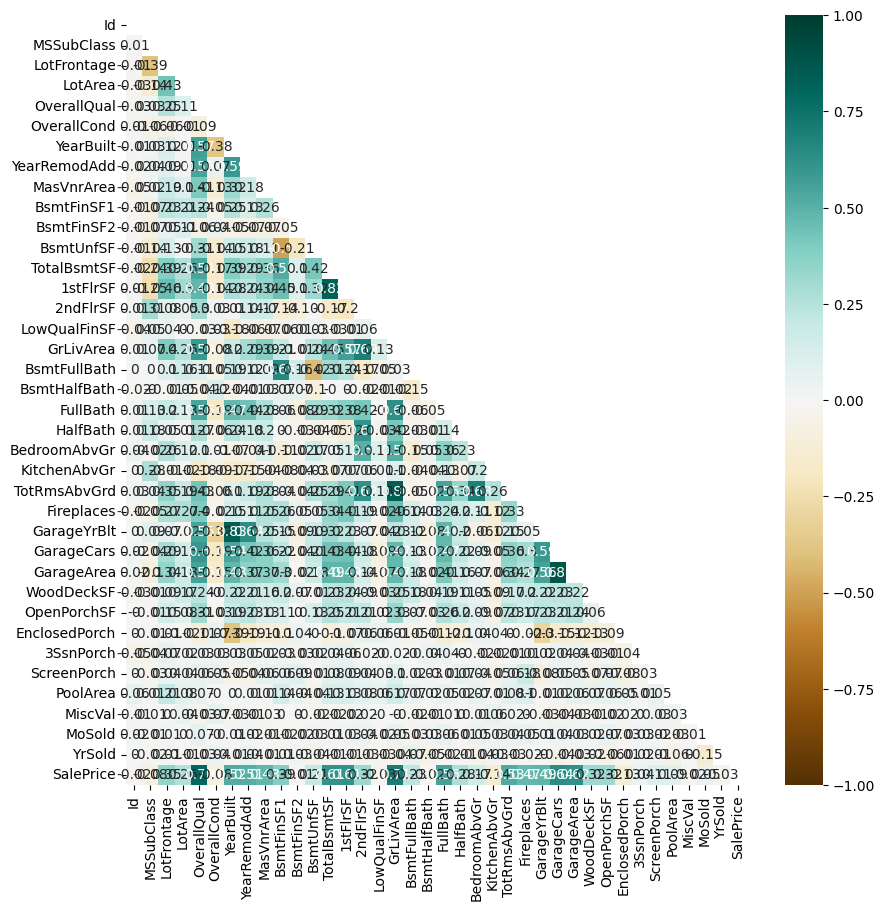

In [7]:
corr_matrix = corr.round(2)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, center=0, vmin=-1, vmax=1, mask=mask, annot=True, cmap='BrBG')
plt.show()

In [8]:
X = data[['GrLivArea']]
Y = data[['SalePrice']]

In [9]:
print(X.head())
print(Y.head())

   GrLivArea
0       1710
1       1262
2       1786
3       1717
4       2198
   SalePrice
0     208500
1     181500
2     223500
3     140000
4     250000


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=1)

In [11]:
print(X.shape)
print(Y.shape)
print()
print(X_train.shape)
print(Y_train.shape)
print()
print(X_test.shape)
print(Y_test.shape)

(1460, 1)
(1460, 1)

(1021, 1)
(1021, 1)

(439, 1)
(439, 1)


In [12]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [13]:
model_coef = model.coef_
print("Model Coefficient:", model_coef.round(2))
model_intercept = model.intercept_
print("Model Intercept:", model_intercept.round(2))

Model Coefficient: [[100.24]]
Model Intercept: [29089.04]


In [14]:
new_GrLivArea = np.array([1500]).reshape(-1, 1)
prediction = model.predict(new_GrLivArea).round(2)
print("Predicted SalePrice for GrLivArea=1500:", prediction)

Predicted SalePrice for GrLivArea=1500: [[179448.28]]


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
equation_predict = (model_coef * new_GrLivArea) + model_intercept
print("Equation Prediction:", equation_predict.round(2))

Equation Prediction: [[179448.28]]


In [16]:
y_test_pred = model.predict(X_test)

In [17]:
print("Actual SalePrice (first 5):")
print(Y_test[:5].values)
print()
print("Predicted SalePrice (first 5):")
print(y_test_pred[:5].round(2))

Actual SalePrice (first 5):
[[231500]
 [179500]
 [122000]
 [ 84500]
 [142000]]

Predicted SalePrice (first 5):
[[208718.21]
 [248814.01]
 [119304.58]
 [ 92239.92]
 [148173.55]]


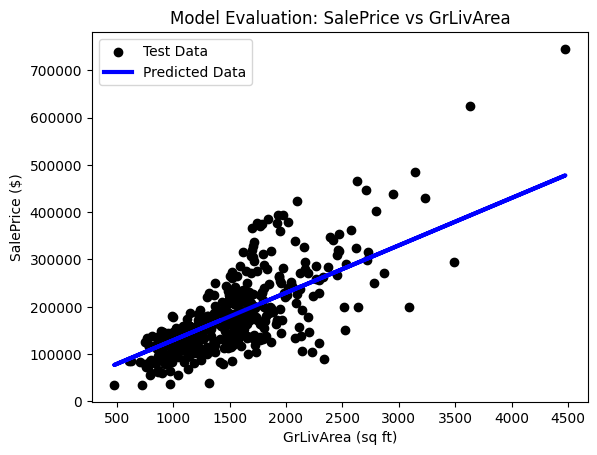

In [18]:
plt.scatter(X_test, Y_test, label='Test Data', color='k')
plt.plot(X_test, y_test_pred, label='Predicted Data', color='b', linewidth=3)
plt.xlabel('GrLivArea (sq ft)')
plt.ylabel('SalePrice ($)')
plt.title('Model Evaluation: SalePrice vs GrLivArea')
plt.legend(loc='upper left')
plt.show()

In [19]:
mse = round(mean_squared_error(Y_test, y_test_pred), 2)
print("Mean Squared Error:", mse)

Mean Squared Error: 3215004095.3


In [20]:
diff = (Y_test - Y_test.mean())
print("Difference from Mean (first 5):")
print(diff.head())

Difference from Mean (first 5):
         SalePrice
258   52007.371298
267       7.371298
288  -57492.628702
649  -94992.628702
1233 -37492.628702
